## Tugas Senin, Materi EDA

Nama : Gisani Miftahul Rahma

Kelas : Ragnarok

Universitas : UPNVYK

**Soal**

**Membuat EDA untuk data set bank churn**

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Mecari tau keadaan dataset**

In [2]:
#Melihat potongan dari data set

df=pd.read_csv("bank_churn.csv")

df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [3]:
#Melihat jumlah dari anggota yang keluar dan tidak

df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [4]:
#Melihat bentuk dataset

df.shape

(10000, 14)

Dataset memiliki 1000 data dan 14 kolom

In [5]:
#Melihat informasi dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
#Melihat null values

df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Tidak terdapat data kosong

In [7]:
# Descriptive analysis

df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [8]:
#Melihat nama setiap kolom dalam dataset

df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

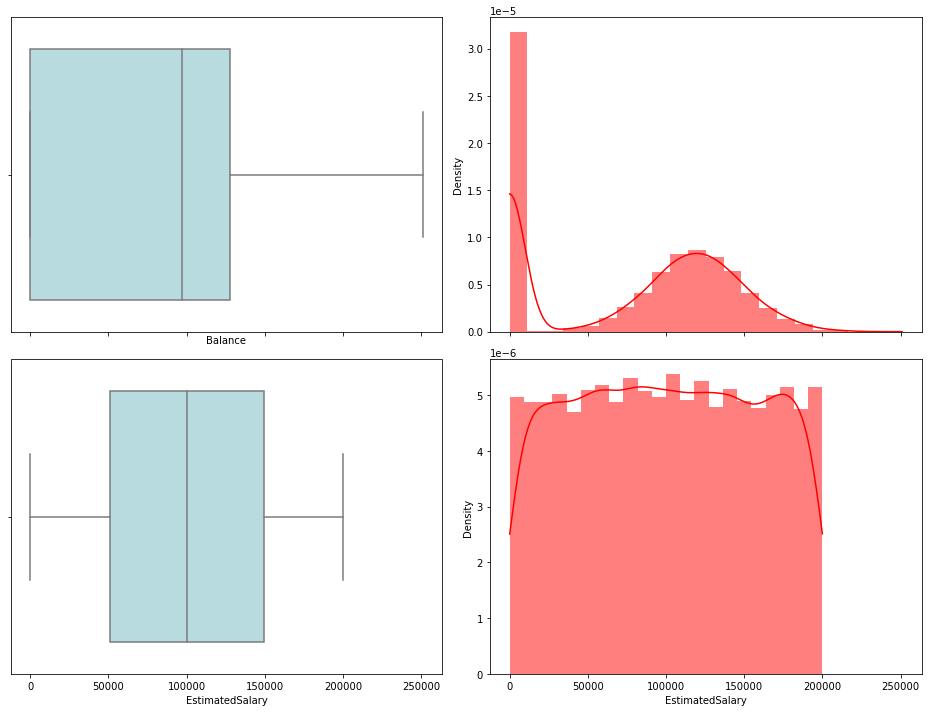

In [9]:
#Melakukan analisis dengan subplots per kolom

f,axes=plt.subplots(ncols=2, nrows=2, figsize=(13,10), sharex=True)

column=['Balance', 'EstimatedSalary']
for i in range(2):
    
    #Ploting the boxplot
    sns.boxplot(x = df[column[i]], ax=axes[i][0], color='powderblue')
    
    # Ploting the KDE
    sns.histplot(data=df[column[i]], ax=axes[i][1],  color="red", kde=True, stat="density", linewidth=0)  
    
    plt.tight_layout()
    

Tiap kolom tidak bisa dimasukkan ke dalam satu sub plot karena memiliki range yang berbeda, sehingga jika disatukan, plot data dengan range kecil akan menjadi tidak terlihat

Analisis dari balance dan estimated salary :

Balance : data tidak memiliki outlier, data tidak berdistribusi normal dikarenakan data tidak berkumpul dalam satu tempat, meskipun kebanyakan data berkumpul

Estimated salary : data tidak memiliki outlier dan data berdistribusi normal, perkumpulan data ada di range 0-200000

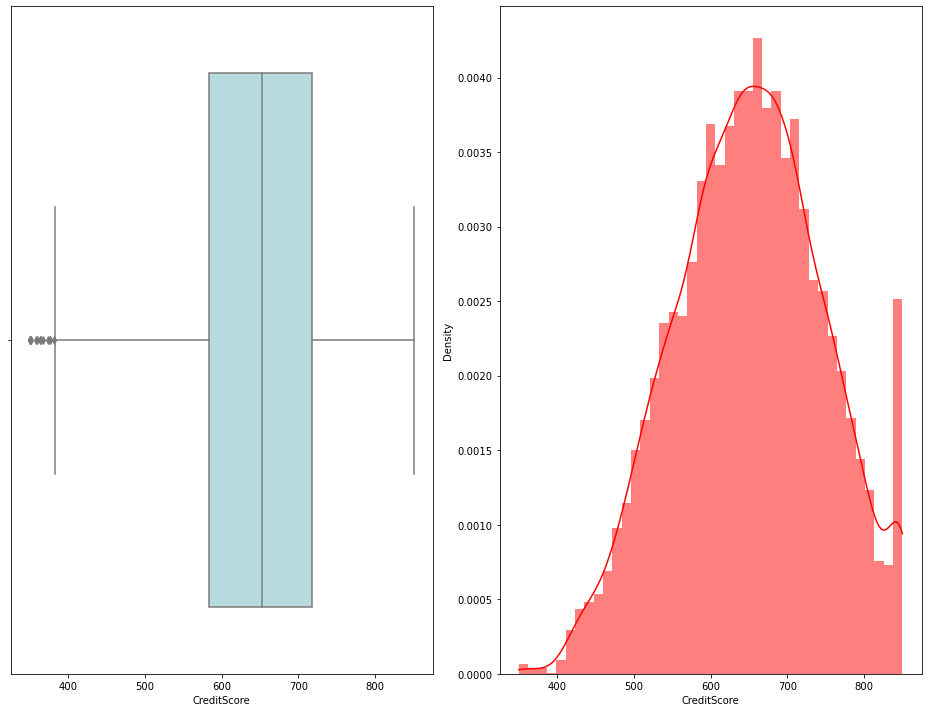

In [10]:
#Melakukan analisis dengan subplots per kolom

f,axes=plt.subplots(ncols=2, figsize=(13,10), sharex=True)
    
#Ploting the boxplot
sns.boxplot(x = df['CreditScore'], ax=axes[0], color='powderblue')
    
# Ploting the KDE
sns.histplot(data=df['CreditScore'], ax=axes[1],  color="red", kde=True, stat="density", linewidth=0)  
    
plt.tight_layout()

Analisis dari credit score :

Data memiliki outlier, persebaran data tidak normal karena ada outlier yang cukup tinggi jumlahnya

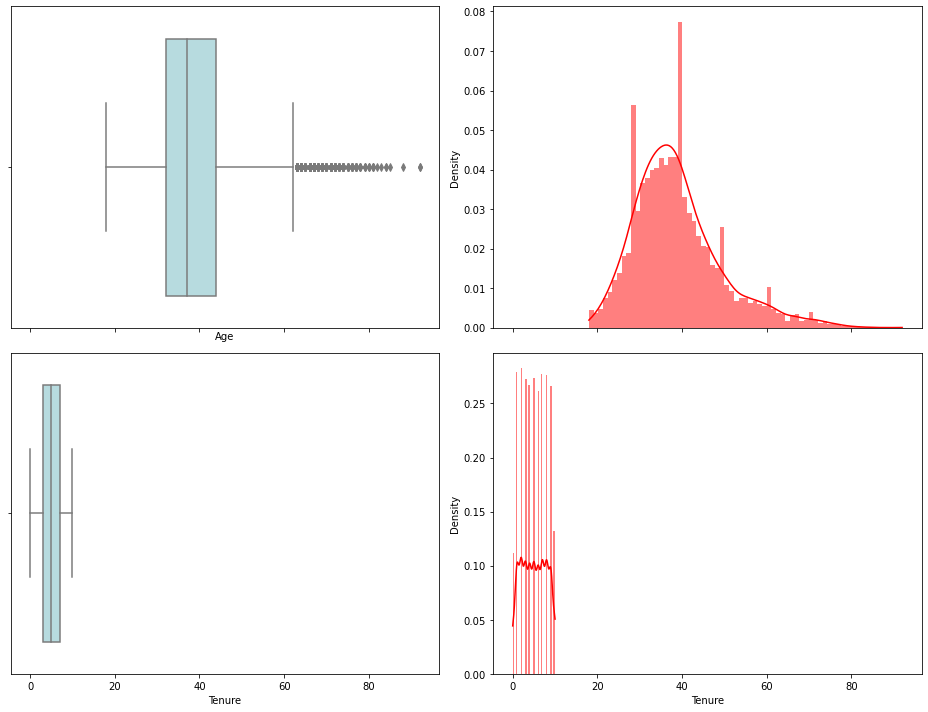

In [11]:
#Melakukan analisis dengan subplots per kolom

f,axes=plt.subplots(ncols=2, nrows=2, figsize=(13,10), sharex=True)

column=['Age', 'Tenure']
for i in range(2):
    
    #Ploting the boxplot
    sns.boxplot(x = df[column[i]], ax=axes[i][0], color='powderblue')
    
    # Ploting the KDE
    sns.histplot(data=df[column[i]], ax=axes[i][1],  color="red", kde=True, stat="density", linewidth=0)  
    
    plt.tight_layout()

Analisis dari age dan estimated tenure :

age : data memiliki outlier namun masih berdistribusi normal

tenure : data tidak memiliki outlier dan data berdistribusi di range 0-10

<AxesSubplot:xlabel='Exited', ylabel='count'>

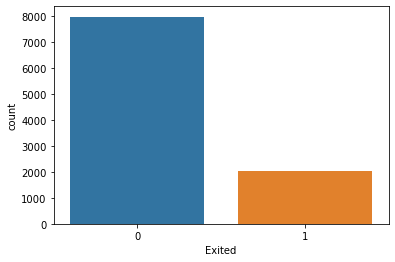

In [12]:
#Melihat perbandingan customer keluar dan tidak keluar

sns.countplot(x=df['Exited'])

Customer yang keluar sangat sedikit dibanding yang tidak keluar

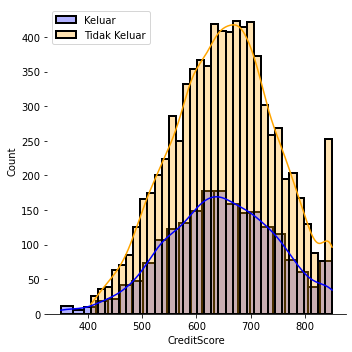

In [13]:
#Membadingkan excited dengan creditscore

# memisahkan data
keluar = df.loc[df['Exited'] == 1]
tidak_keluar = df.loc[df['Exited'] == 0]

f, axes = plt.subplots(ncols = 1,figsize=(5, 5), sharex=True)
sns.despine(left=True) 

# Ploting the histogram with KDE

sns.histplot(data=keluar["CreditScore"],label="Keluar",color='b',kde=True,linewidth=2,alpha=0.3)
sns.histplot(data=tidak_keluar["CreditScore"],label="Tidak Keluar",kde=True,color='orange',linewidth=2,alpha=0.3)


plt.legend()
plt.tight_layout()

dalam hal creditscore, keduanya tidak jauh berbeda baik customer yang sudah keluar maupun belum

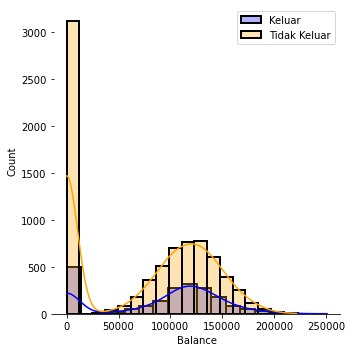

In [14]:
#Membadingkan excited dengan balance


f, axes = plt.subplots(ncols = 1,figsize=(5, 5), sharex=True)
sns.despine(left=True) 

# Ploting the histogram with KDE

sns.histplot(data=keluar["Balance"],label="Keluar",color='b',kde=True,linewidth=2,alpha=0.3)
sns.histplot(data=tidak_keluar["Balance"],label="Tidak Keluar",kde=True,color='orange',linewidth=2,alpha=0.3)


plt.legend()
plt.tight_layout()

Dalam balance keduanya juga tidak jauh berbeda

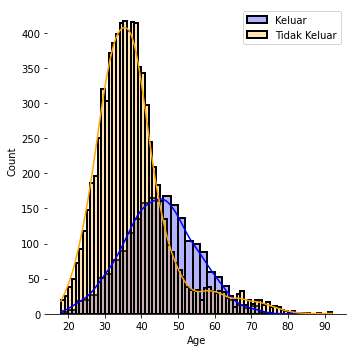

In [15]:
#Membadingkan excited dengan age


f, axes = plt.subplots(ncols = 1,figsize=(5, 5), sharex=True)
sns.despine(left=True) 

# Ploting the histogram with KDE

sns.histplot(data=keluar["Age"],label="Keluar",color='b',kde=True,linewidth=2,alpha=0.3)
sns.histplot(data=tidak_keluar["Age"],label="Tidak Keluar",kde=True,color='orange',linewidth=2,alpha=0.3)


plt.legend()
plt.tight_layout()

Dalam umur, customer yang keluar lebih cenderung tua dibanding yang tidak keluar. Customer keluar ada di range 30-60, sementara yang tidak ada di range 25-50

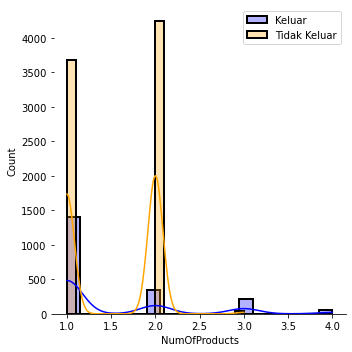

In [16]:
#Membadingkan excited dengan numofproducts


f, axes = plt.subplots(ncols = 1,figsize=(5, 5), sharex=True)
sns.despine(left=True) 

# Ploting the histogram with KDE

sns.histplot(data=keluar["NumOfProducts"],label="Keluar",color='b',kde=True,linewidth=2,alpha=0.3)
sns.histplot(data=tidak_keluar["NumOfProducts"],label="Tidak Keluar",kde=True,color='orange',linewidth=2,alpha=0.3)


plt.legend()
plt.tight_layout()

Dalam num of products, customer yang keluar memiliki persebaran yang luas antara 1-4, sementara customer yang tidak keluar hanya memilih produk 1 dan 2

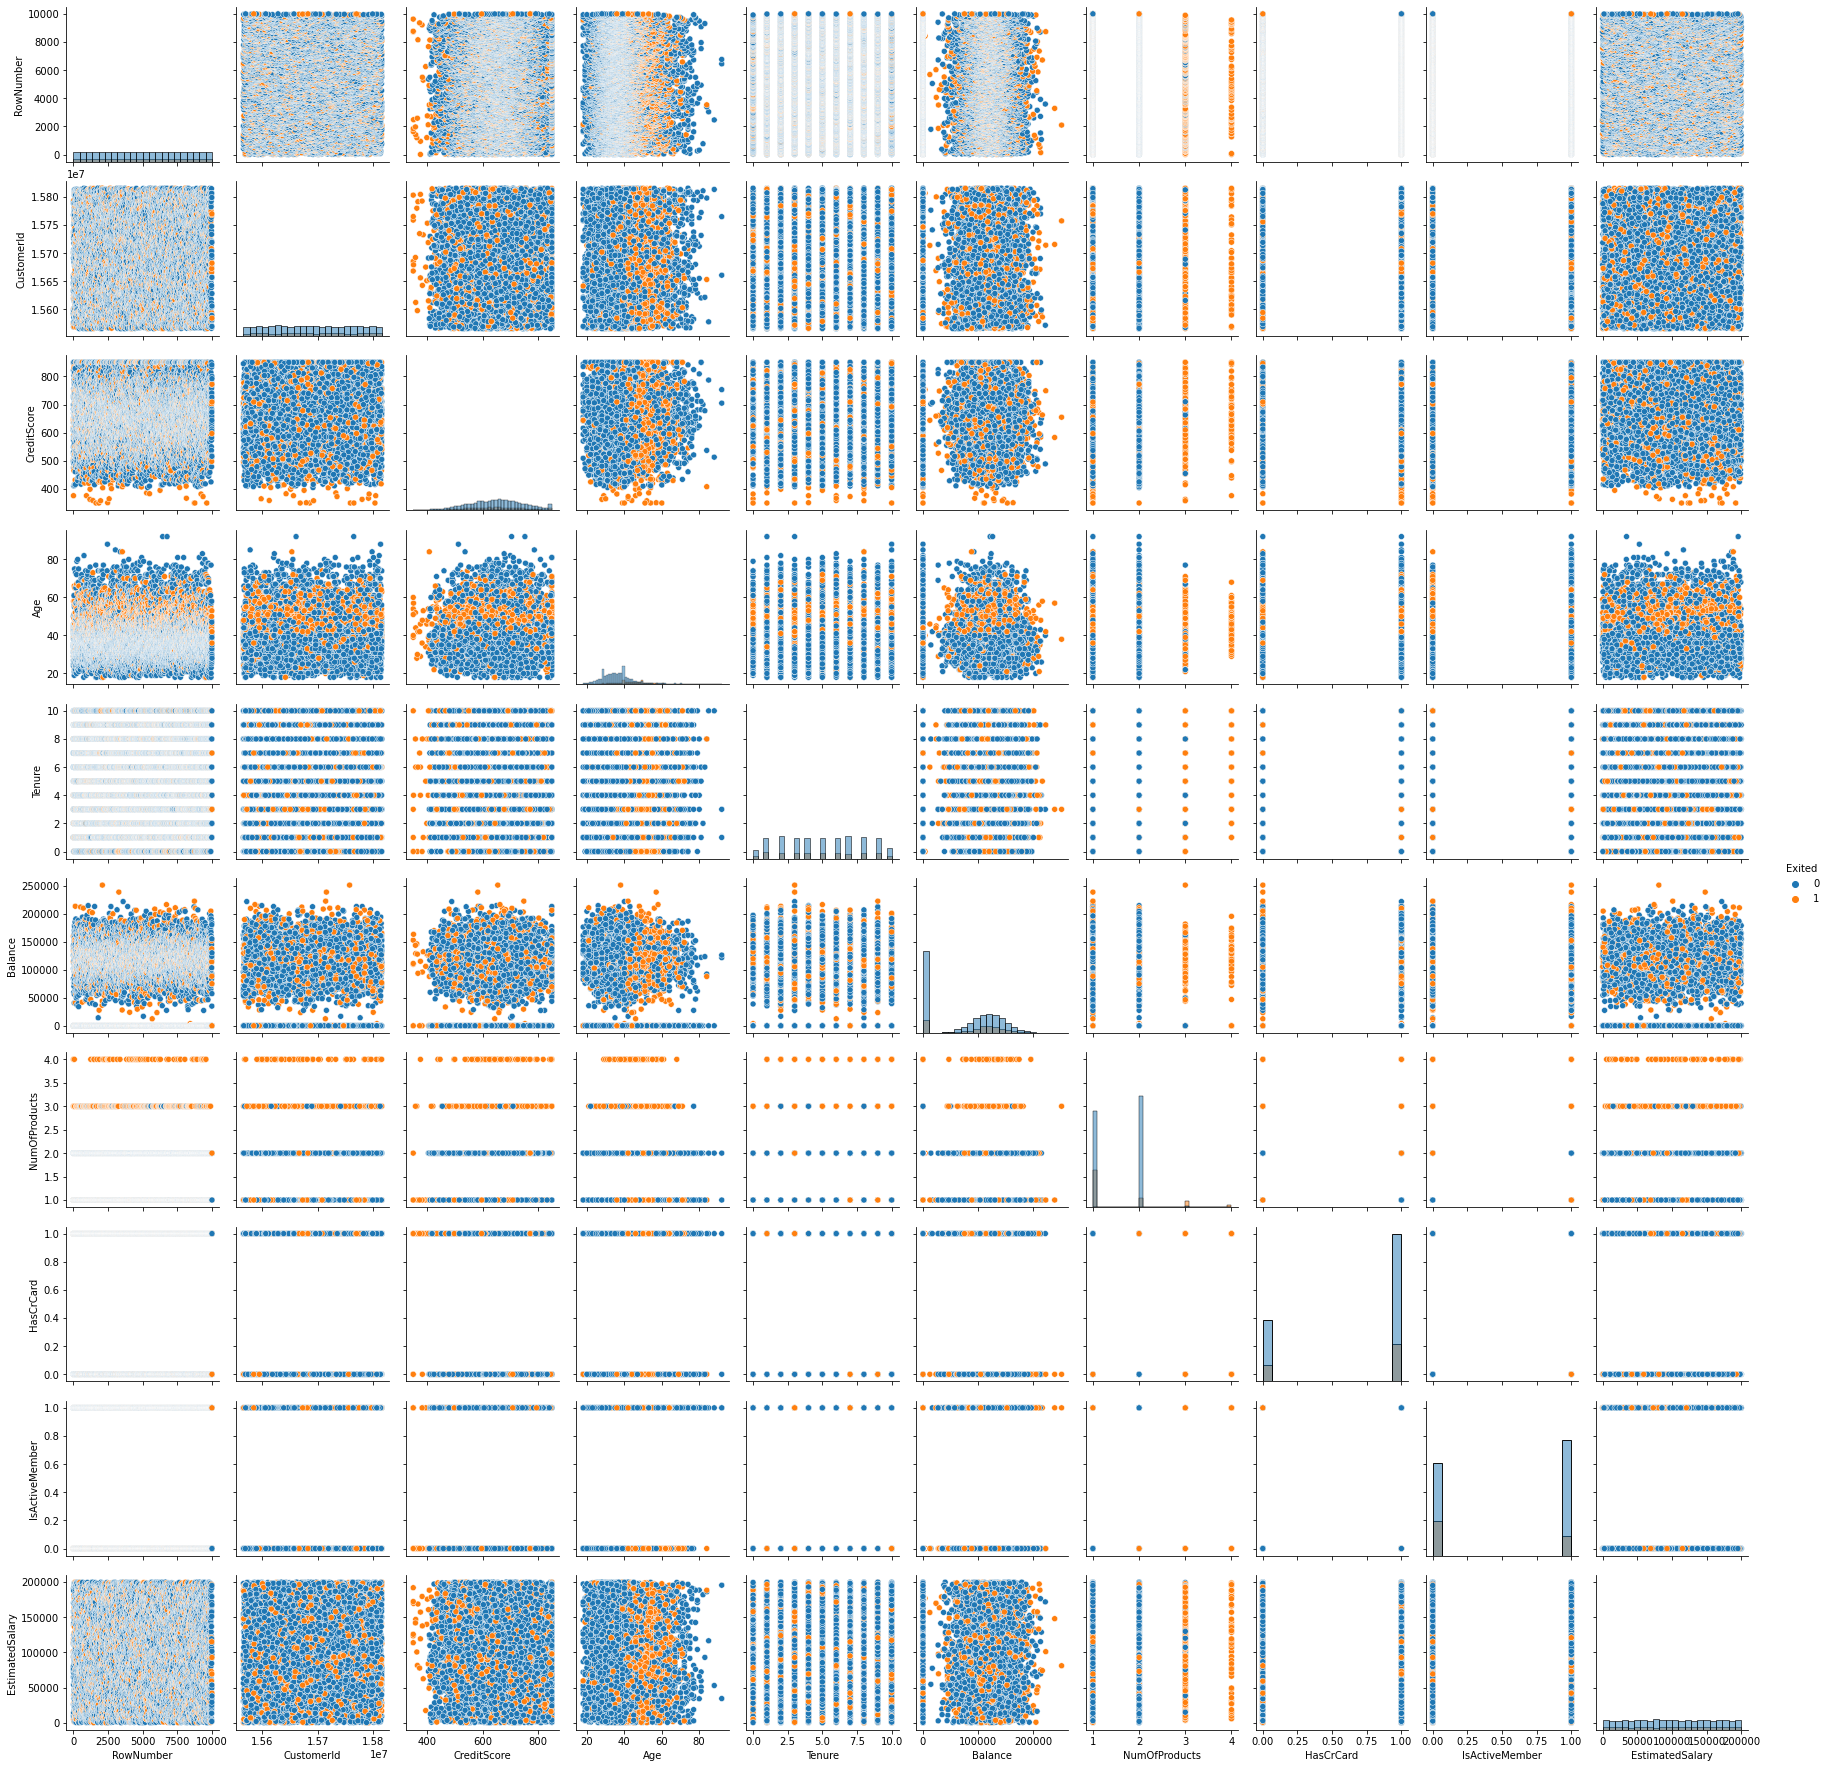

In [17]:
sns.pairplot(df, hue="Exited", diag_kind="hist")
plt.show()

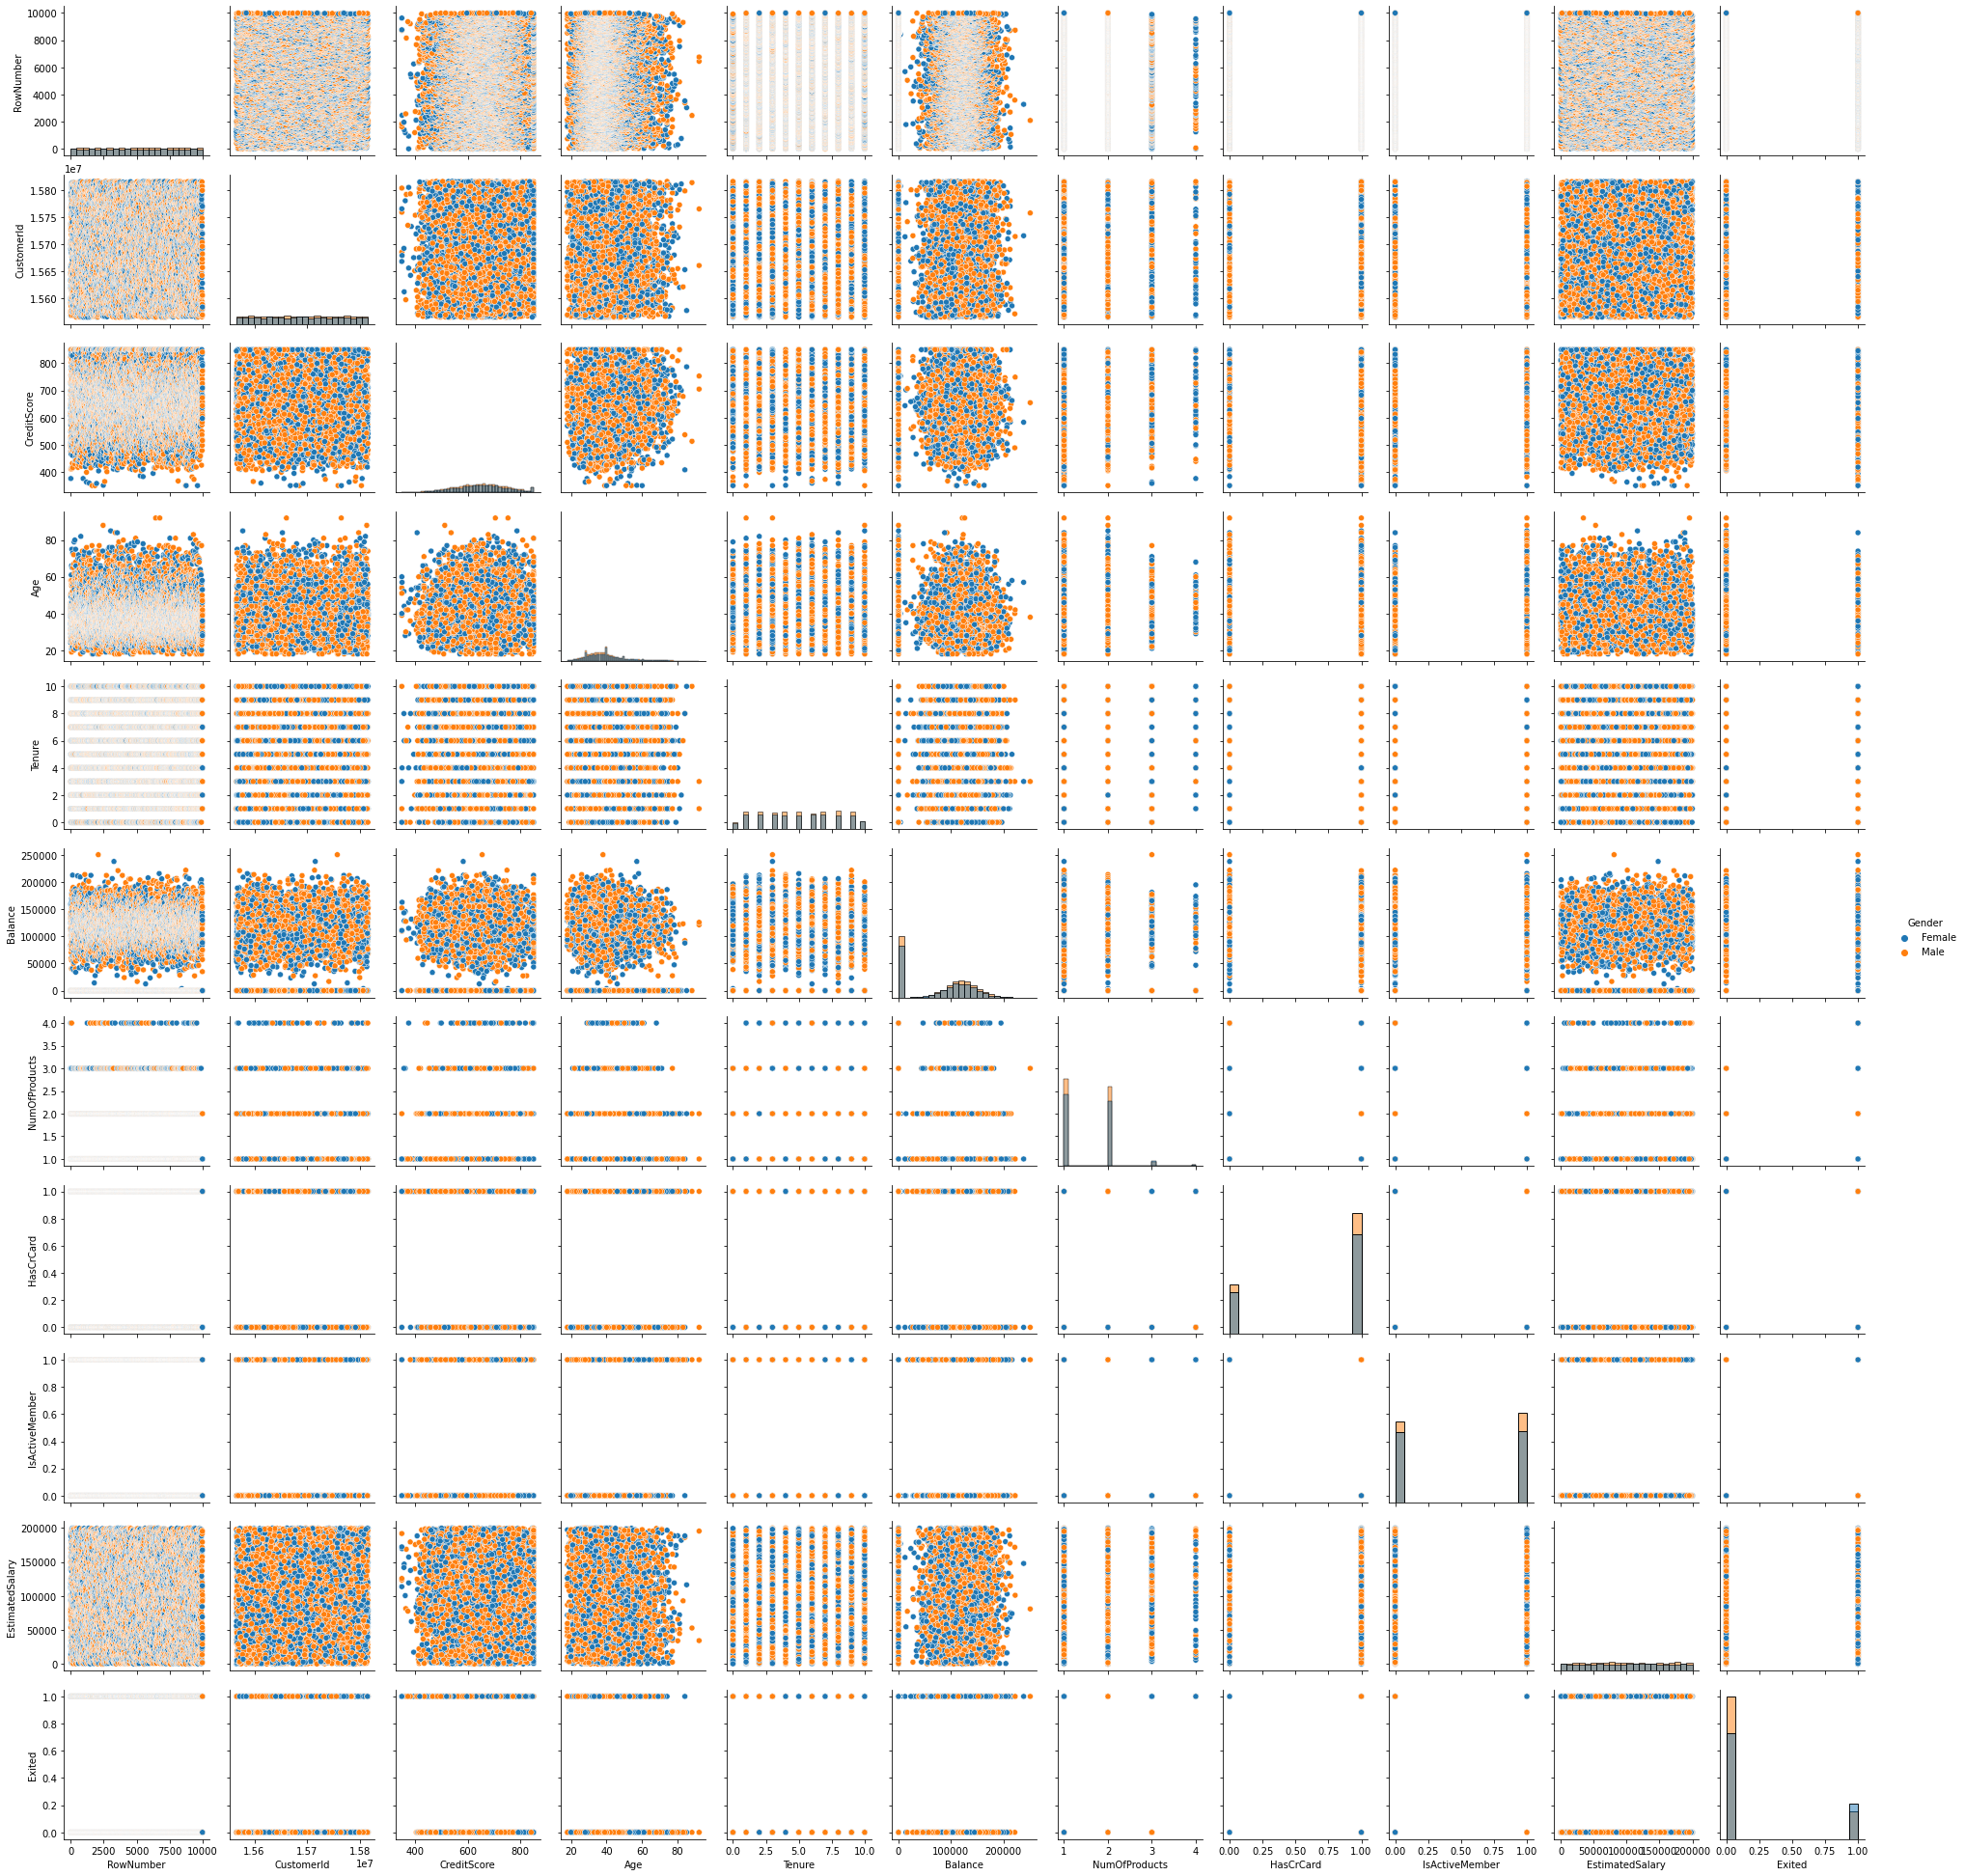

In [18]:
sns.pairplot(df, hue="Gender", diag_kind="hist")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 92.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 75.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


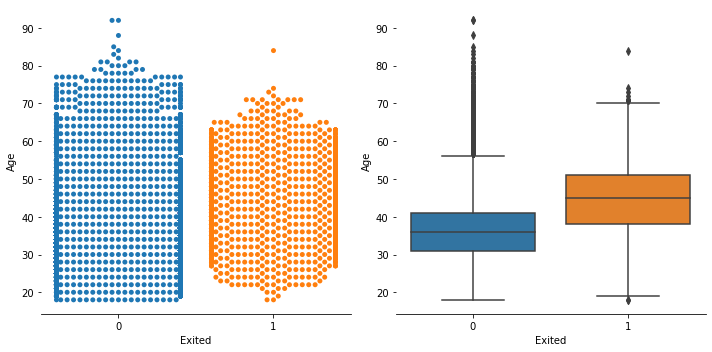

In [19]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols = 2, figsize=(10, 5), sharex=True)
sns.despine(left=True)

# Plot the Swarmplot
sns.swarmplot(x=df['Exited'], y=df['Age'], ax=axes[0])

# Plot the Boxplot
sns.boxplot(x=df['Exited'], y=df['Age'], ax=axes[1])

plt.tight_layout()